In [3]:
# Problem: want to find the root of the follwing equations:

$$ 2{\left[{(x+y)^2-(2/197)^2}\right]^{3/2}}-{\left({x^2-(5/197)^2}\right)^{3/2}}-{\left({x^2-(95/197)^2}\right)^{3/2}}-{\left({y^2-(0.6/197)^2}\right)^{3/2}}=0 \tag{1}$$

$${\left[{(x+y)^2-(2/197)^2}\right]^{3/2}}+{\left({x^2-(5/197)^2}\right)^{3/2}}+{\left({x^2-(95/197)^2}\right)^{3/2}}=10k\tag{2}$$
 values of k ranging from 0 to 1.5 in a.u
In the above we have two equations two unknowns ideally that can be solved. Maybe numpy fsolve can do our job.

 https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

 For that we need to provide initial guess ( starting x and y values) to the fsolve function. I took k=0 and and add eq. 1 and 2, yields

  $$3{\left[{(x+y)^2-(2/197)^2}\right]^{3/2}} - {\left({y^2-(0.6/197)^2}\right)^{3/2}}=0 $$

  $$3{\left[{(x+y)^2-(2/197)^2}\right]^{3/2}} ={\left({y^2-(0.6/197)^2}\right)^{3/2}} \tag{3}$$

  squring both sides we obtained 

$$9\left[{(x+y)^2-(2/197)^2}\right]^{3} ={\left({y^2-(0.6/197)^2}\right)^{3}} \tag{4}$$

It can be inferred that if $(x+y)=2/197$ and $ y=0.6/197$ then eqn.4 becomes zero means $f(x,y)=0 $. hence $x\approx 2/197$ 

So our initial guess becomes $(x0,y0)=(2/197,0.6/197)$ however in reality k is not exactly zero, under physical assumption, one can choose a starting value of k around 0.3 $1/fm^3$. If we rescale to $1/fm$ to make sure the unit for lhs and rhs of above equations are same. Under this assumption the a good physical guess lies around $x0: 1.5$ and $y0 \approx 0.005$ in the unit of $1/fm$ and that gives us a acceptable physical values!



In [4]:
x=1.5
y=0.005
k=0.3

f_1=2*((x+y)**2-(2/197)**2)**(3/2)-(x**2-(5/197)**2)**(3/2)-(x**2-(95/197)**2)**(3/2)-(y**2-(0.6/197)**2)**(3/2)
f_2=((x+y)**2-(2/197)**2)**(3/2)+(x**2-(5/197)**2)**(3/2)+(x**2-(9/197)**2)**(3/2)-10*k                               #eqn (2) 


print("the value of f_1:{}".format(f_1)) #not exactly zero but quite resaonable
print("the value of f_2:{}".format(f_2)) #not exactly zero but quite resonable


the value of f_1:0.5781825392559121
the value of f_2:7.152485660900556


In [5]:
#now our job is to solve eq.1 and eq.2 for x and y

import numpy as np
import scipy.optimize 
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from sympy import *
from sympy import lambdify



In [6]:
def function(z,k):                         
    x=z[0]                                               
    y=z[1]      

    f_1=2*((x+y)**2-(2/197)**2)**(3/2)-(x**2-(5/197)**2)**(3/2)-(x**2-(95/197)**2)**(3/2)-(y**2-(0.6/197)**2)**(3/2)       #eqn (1) 
    f_2=((x+y)**2-(2/197)**2)**(3/2)+(x**2-(5/197)**2)**(3/2)+(x**2-(9/197)**2)**(3/2)-10*k                               #eqn (2) 

    
    return (f_1,f_2)

In [7]:
x=[]           
y=[]           
x0=1.5# 1/fm 
y0= 0.005# 1/fm  
guess=x0,y0 #MeV,  # initial guess (x0,y0) for which f_1 and f_2 tends to zero


k=np.linspace(0.3,1.4) #  density in 1/fm^3

z=fsolve(function,(guess),args=(k[0]),xtol=1.49012e-08)

for i in range(k.size):
    
    z_1=fsolve(function,(z),args=(k[i]),xtol=1.49012e-08)
    z=z_1

    x.append(z[0])       
             
    y.append(z[1])       



In [8]:
np.array(x) #chemical potential of baryons

array([1.01874566, 1.04269911, 1.06557865, 1.08749762, 1.10855132,
       1.12882073, 1.14837533, 1.1672752 , 1.18557274, 1.20331392,
       1.22053934, 1.23728502, 1.25358315, 1.26946257, 1.28494925,
       1.30006668, 1.31483618, 1.32927714, 1.3434073 , 1.3572429 ,
       1.37079887, 1.38408896, 1.39712585, 1.40992132, 1.42248625,
       1.43483078, 1.44696435, 1.45889577, 1.47063327, 1.48218456,
       1.49355686, 1.50475698, 1.51579129, 1.52666581, 1.53738621,
       1.54795786, 1.55838581, 1.56867485, 1.57882955, 1.58885419,
       1.59875288, 1.60852951, 1.61818777, 1.6277312 , 1.63716314,
       1.64648681, 1.65570527, 1.66482144, 1.67383811, 1.68275796])

In [9]:
np.array(y) #chemical potential of electrons

array([-0.05694451, -0.05565869, -0.05448204, -0.05339931, -0.05239814,
       -0.05146835, -0.05060148, -0.04979044, -0.04902922, -0.04831271,
       -0.04763648, -0.04699675, -0.04639019, -0.0458139 , -0.04526534,
       -0.04474224, -0.04424261, -0.04376466, -0.04330679, -0.04286758,
       -0.04244572, -0.04204006, -0.04164953, -0.04127318, -0.04091011,
       -0.04055954, -0.04022073, -0.03989301, -0.03957575, -0.03926838,
       -0.03897037, -0.03868125, -0.03840054, -0.03812784, -0.03786275,
       -0.0376049 , -0.03735396, -0.03710961, -0.03687155, -0.0366395 ,
       -0.03641321, -0.03619242, -0.0359769 , -0.03576645, -0.03556085,
       -0.03535991, -0.03516345, -0.0349713 , -0.0347833 , -0.03459928])

Text(0, 0.5, ' chemical potential\\,[MeV]')

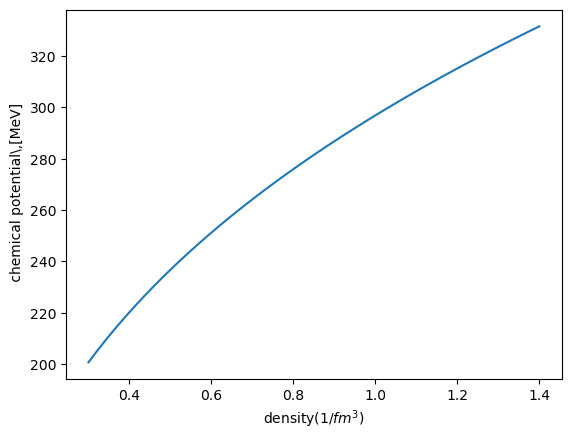

In [10]:
plt.plot(k,np.array(x)*197)
plt.xlabel("density($1/fm^3$)")
plt.ylabel(" chemical potential\,[MeV]")

Solving system of Non linear equations for x and y:
$$f(x,y)=x^2+y^2-1=0$$
$$g(x,y)=y-x^2=0$$

In [11]:
x, y= symbols('x y ')
init_printing(use_unicode=True)

In [12]:
#writing functions

def f(x,y):
    return x**2+y**2-1
def g(x,y):
    return y-x**2


In [13]:
#taking derivative of functions

#diff(f(x,y), x)
#diff(f(x,y), y)
#diff(g(x,y),x)
#diff(g(x,y),y)

In [14]:
#symbolic to numercal conversion

#f11 = lambdify(x, 2*x)

#f = lambdify([x, y], x + y)
#f(1,1)

In [15]:
def newton_raphson(x,y):
    n=0
    while n<100:
        J=np.matrix([[2*x ,2*y ],[-2*x, 1]])
        J_inv=np.linalg.inv(J)
        first_term=np.matrix([[x],[y]])
        Matrix=np.matrix([[f(x,y)],[g(x,y)]])
        second_term=np.dot(J_inv,Matrix)
        res=first_term-second_term
        x=float(res[0])
        y=float(res[1])
        n=n+1
        return (x,y)



In [16]:
root1=newton_raphson(0.5,0.5)

root2=newton_raphson(-0.5,0.5)
print("root1 is: ",root1, "and root2 is:" ,root2)

root1 is:  (0.875, 0.625) and root2 is: (-0.875, 0.625)


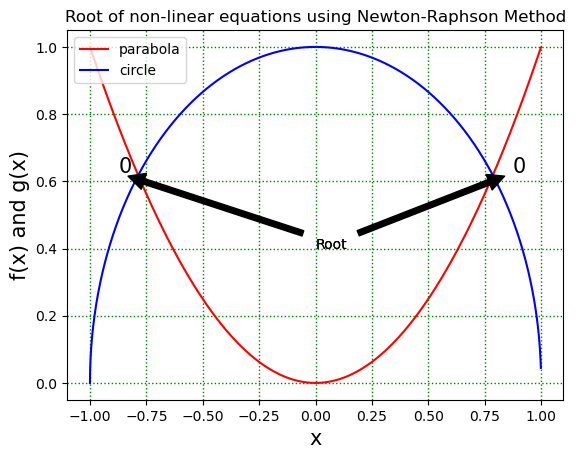

In [17]:
x=np.arange(-1,1,0.001)
plt.plot(x,x**2, color="red",label="parabola")
plt.plot(x,np.sqrt(1-x**2),color="blue",label="circle")
plt.legend(loc="upper left")
plt.xlabel("x",fontsize=15)
plt.ylabel("f(x) and g(x)", fontsize=15)
plt.title("Root of non-linear equations using Newton-Raphson Method")
plt.text(root1[0],root1[1],"0",fontsize=15)
plt.text(root2[0],root2[1],"0",fontsize=15)
plt.annotate("Root", xy=(root1[0],root1[1]),xytext=(0,0.4),arrowprops=dict(facecolor="black",shrink=0.05))
plt.annotate("Root", xy=(root2[0],root2[1]),xytext=(0,0.4),arrowprops=dict(facecolor="black",shrink=0.05))
plt.grid(color="green", linestyle=":", linewidth=1)

In [18]:
m_u,m_d,m_s,m_e,m_c=2.2/197,4.7/197,96/197,0.5/197,1270/197 #1/fm
R=np.linspace(0,1.4,100)

def f1(x_1,y_1):
    
    return ((x_1+y_1)**2-m_u**2)**(3/2)+(x_1**2-m_d**2)**(3/2)+(x_1**2-m_s**2)**(3/2)+((x_1+y_1)**2-m_c**2)**(3/2)-3*np.pi**2*R[i]               #eqn (U) 

def f2(x_1,y_1):
    return 2*((x_1+y_1)**2-m_u**2)**(3/2)-(x_1**2-m_d**2)**(3/2)-(x_1**2-m_s**2)**(3/2)+2*((x_1+y_1)**2-m_c**2)**(3/2)-(y_1**2-m_e**2)**(3/2)       #eqn (V) 
     

In [19]:
f1(1270/197,1/197)




In [20]:
f2(1270/197,1/197)

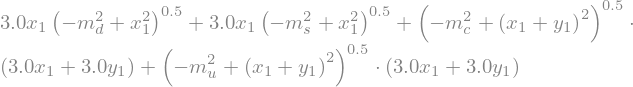

In [21]:
x_1,y_1=symbols('x_1,y_1')
m_u,m_d,m_s,m_e,m_c=symbols('m_u,m_d,m_s,m_e,m_c')


diff(f1(x_1,y_1),x_1)

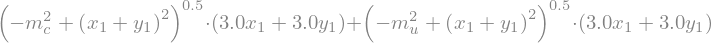

In [22]:
diff(f1(x_1,y_1),y_1)

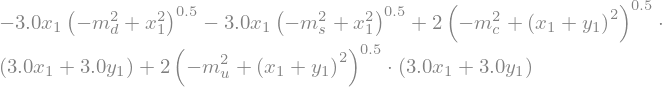

In [23]:
diff(f2(x_1,y_1),x_1)

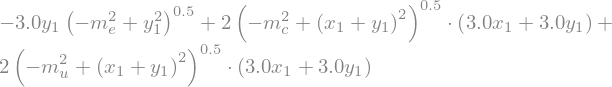

In [24]:
diff(f2(x_1,y_1),y_1)

In [25]:
x_1=[]
y_1=[]

def newton_raphson_1(x_1,y_1):

    n=0
    
    while n<100:
        
        #m_u,m_d,m_s,m_e,m_c=2.2/197,4.7/197,96/197,0.5/197,1270/197 #1/fm

        j11=3*x_1*(-m_d**2+x_1**2)**0.5+3*x_1*(-m_s**2+x_1**2)**0.5+(-m_c**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)+(-m_u**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)
        j12=(-m_c**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)+(-m_u**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)
        j21=-3*x_1*(-m_d**2+x_1**2)**0.5-3*x_1*(-m_s**2+x_1**2)**0.5+2*(-m_c**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)+2*(-m_u**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)
        j22=-3*y_1*(-m_e**2+y_1**2)**0.5+2*(-m_c**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)+2*(-m_u**2+(x_1+y_1)**2)**0.5*(3*x_1+3*y_1)

        J=np.matrix([[j11 ,j12 ],[j21, j22]])

        #J_inv=np.linalg.inv(J)
        detJ=j11*j22-j12*j21

        J_inv=np.matrix([[j22 ,-j12 ],[-j21, j11]])/detJ

        first_term=np.matrix([[x_1],[y_1]])

        Matrix=np.matrix([[f1(x_1,y_1)],[f2(x_1,y_1)]])

        second_term=np.dot(J_inv,Matrix)

        res=first_term-second_term
        
        x_1=float(res[0])
        y_1=float(res[1])
        n=n+1
        return (x_1,y_1)

In [26]:
m_u,m_d,m_s,m_e,m_c=2.2/197,4.7/197,96/197,0.5/197,1270/197 #1/fm

newton_raphson_1(1270/197,1/197)

In [27]:
x_1.append(newton_raphson_1(1270/197,1/197)[0])

In [28]:
x_1

In [29]:
for i in range(R.size):
    result=newton_raphson_1(1270/197,1/197)
    x_1.append(result[0])
    y_1.append(result[1])


In [30]:
np.array(x_1)

array([4.35887639, 4.30394563, 4.30506666, 4.3061877 , 4.30730874,
       4.30842977, 4.30955081, 4.31067184, 4.31179288, 4.31291392,
       4.31403495, 4.31515599, 4.31627702, 4.31739806, 4.3185191 ,
       4.31964013, 4.32076117, 4.3218822 , 4.32300324, 4.32412428,
       4.32524531, 4.32636635, 4.32748738, 4.32860842, 4.32972946,
       4.33085049, 4.33197153, 4.33309256, 4.3342136 , 4.33533464,
       4.33645567, 4.33757671, 4.33869774, 4.33981878, 4.34093982,
       4.34206085, 4.34318189, 4.34430292, 4.34542396, 4.346545  ,
       4.34766603, 4.34878707, 4.3499081 , 4.35102914, 4.35215018,
       4.35327121, 4.35439225, 4.35551328, 4.35663432, 4.35775535,
       4.35887639, 4.35999743, 4.36111846, 4.3622395 , 4.36336053,
       4.36448157, 4.36560261, 4.36672364, 4.36784468, 4.36896571,
       4.37008675, 4.37120779, 4.37232882, 4.37344986, 4.37457089,
       4.37569193, 4.37681297, 4.377934  , 4.37905504, 4.38017607,
       4.38129711, 4.38241815, 4.38353918, 4.38466022, 4.38578

In [31]:
np.array(y_1)

array([0.07915566, 0.07910965, 0.07906365, 0.07901765, 0.07897165,
       0.07892564, 0.07887964, 0.07883364, 0.07878763, 0.07874163,
       0.07869563, 0.07864962, 0.07860362, 0.07855762, 0.07851162,
       0.07846561, 0.07841961, 0.07837361, 0.0783276 , 0.0782816 ,
       0.0782356 , 0.0781896 , 0.07814359, 0.07809759, 0.07805159,
       0.07800558, 0.07795958, 0.07791358, 0.07786758, 0.07782157,
       0.07777557, 0.07772957, 0.07768356, 0.07763756, 0.07759156,
       0.07754555, 0.07749955, 0.07745355, 0.07740755, 0.07736154,
       0.07731554, 0.07726954, 0.07722353, 0.07717753, 0.07713153,
       0.07708553, 0.07703952, 0.07699352, 0.07694752, 0.07690151,
       0.07685551, 0.07680951, 0.0767635 , 0.0767175 , 0.0766715 ,
       0.0766255 , 0.07657949, 0.07653349, 0.07648749, 0.07644148,
       0.07639548, 0.07634948, 0.07630348, 0.07625747, 0.07621147,
       0.07616547, 0.07611946, 0.07607346, 0.07602746, 0.07598146,
       0.07593545, 0.07588945, 0.07584345, 0.07579744, 0.07575

In [32]:
Data1 = []
E_c = 182/0.1095 

while E_c < 1545/0.1095: 
    E_c *= 1.0001
    Data1.append(E_c)


In [33]:
182/0.1095

In [34]:
np.array(Data1)

array([ 1662.26666667,  1662.43289333,  1662.59913662, ...,
       14107.05758286, 14108.46828862, 14109.87913545])